# This is a kernel for house price:advanced regression techniques dataset

## Imports

In [447]:
#performing imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy import stats
import warnings
import missingno as msno
from scipy.stats import boxcox,skew,norm
warnings.filterwarnings('ignore')
%matplotlib inline

In [448]:
#reading the trainset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [449]:
#Taking a look at the columns and shape of the trainset
print("Columns of trainset: ",train.columns)
print("Shape of the trainset: ",train.shape)

Columns of trainset:  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

In [450]:
#printing the head of the trainset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [451]:
#listing the numeric features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [452]:
#listing the categorical features
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [453]:
#the ID column is only for indexing and won't help much in training the ML model.So it's safe to delete it

train_ID = train['Id']
test_ID = test['Id']

train = train.drop("Id",axis=1,inplace=False)
test = test.drop("Id",axis=1,inplace=False)

#printing the shapes of train set and test set just to verify that the ID column has been dropped
print("Trainset shape ",train.shape)
print("Testset shape ",test.shape)

Trainset shape  (1460, 80)
Testset shape  (1459, 79)


## Data Analysis

First of all, just to be informed, SalePrice is our target variable. Let's see it's stats using the describe function

In [454]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

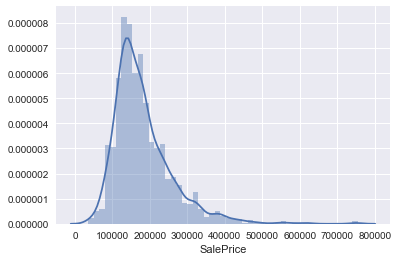

In [455]:
#visualising a histogram of the target variable to see it's distribution
sns.distplot(train['SalePrice'])

As you can see, there are some things noteworthy:<br>
-> There's a deviation from normal distribution<br>
-> Having positive skewness<br>
-> Having peakedness<br>

In [456]:
#calculating skewness and kutrosis for SalePrice
print("Skewness: ",train['SalePrice'].skew())
print("Kurtosis: ",train['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


For an ideal distribution, skewness and kurtosis both should be zero

#### Creating correlation matrices both general and zoomed style

In [457]:
#creating a correlation matrix
corr_mat = train.corr()
print(corr_mat['SalePrice'].sort_values(ascending=False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



The maximum value of the correlation aside from itself is 0.79, so let's keep the vmax for the sns heatmap be 0.8 to have a more customised heatmap

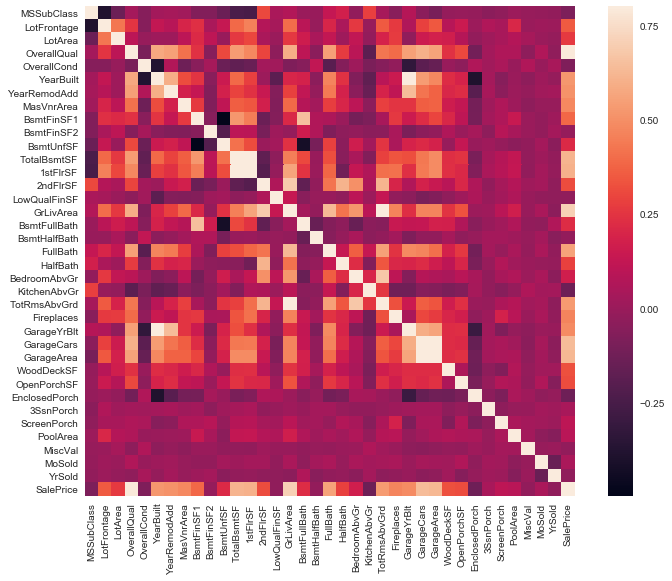

In [458]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,square=True,vmax=0.8)

Some noteworthy things:<br>
->'TotalBsmtSF' and '1stFlrSF' are highly correlated<br>
->'GarageCars' and 'GarageArea' are highly correlated<br>
->The Target Variable SalePrice is likely to be correlated to 'OverallQual','GrLivArea','TotalBsmtSF' and 'GarageCars'

#### ZoomedHeatMap

Let's create a zoomed heat map using the top 12 highly correlated features with SalePrice

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


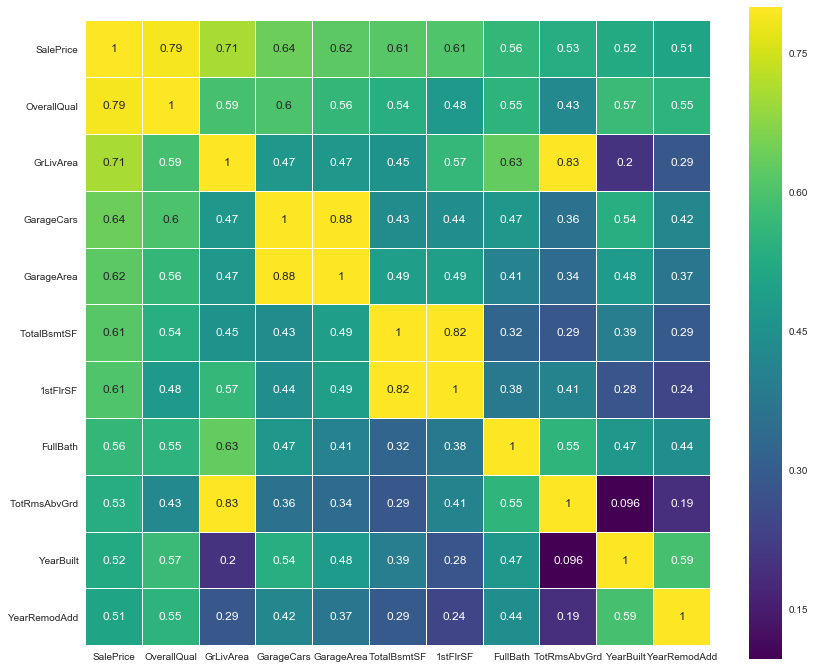

In [459]:
k= 11
cols = corr_mat.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Some notes:<br>
-> OverallQual,GrLiveArea,GarageCars, GarageArea and TotalBsmtSF are strongly correlated to SalePrice<br>
-> GarageCars and GarageArea are so correlated to each other and their correlation matrix shows they can be replaced with each other. GarageCars has more correlation to SalePrice than GarageArea and GarageArea should be dropped<br>
->TotalBsmtSF and 1stFlrSF can also be considered as twins<br>
->TotRmsAbvGrd and GrLivArea are twins as well<br>

#### Plotting Correlations of Sale Price with some of the strong correlating variables

#### Relationship with Numerical Variables

The limit on y can be set at 800000 as we have seen that the max value on y is 755000

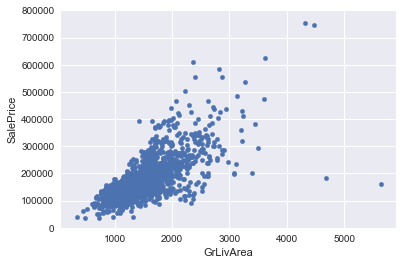

In [460]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

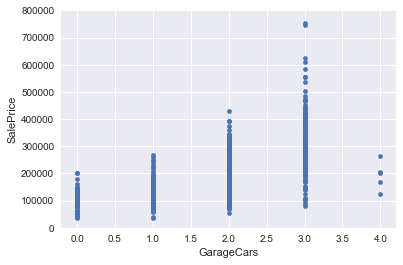

In [461]:
#scatter plot garagecars/saleprice. this is not a numerical variable but a dummy variable
var = 'GarageCars'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

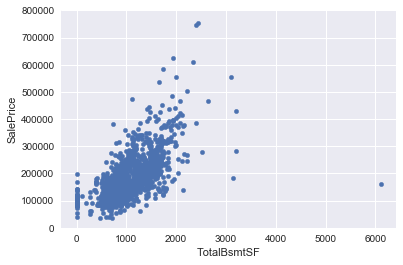

In [462]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

#### Relationship with Categorical Features

(-0.5, 9.5, 0, 800000)

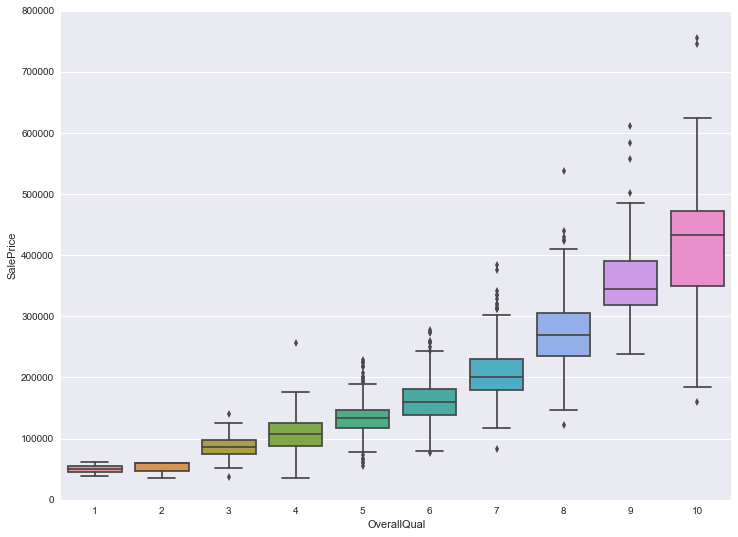

In [463]:
#bos plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
f, ax = plt.subplots(figsize=(12,9))
fig = sns.boxplot(x=var, y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

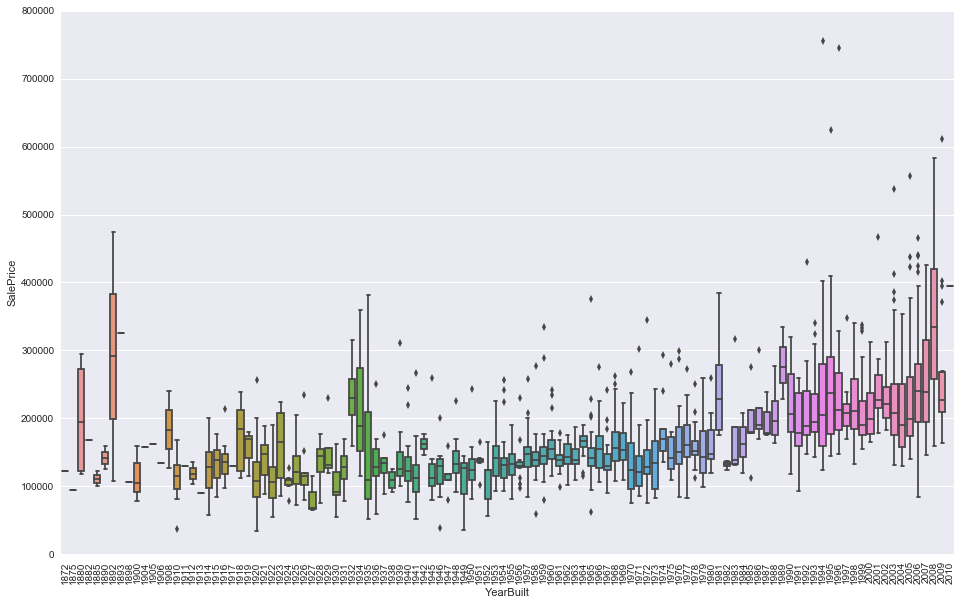

In [464]:
#box plot yearbuilt/saleprice
var = 'YearBuilt'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
f,ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

These are the plots with the highly correlated variables.Some noteworthy points can be:<br>
->GrLivArea and SalePrice are having a linear relationship<br>
->The GarageCars is likely to have outliers on its value 3<br>
->TotalBsmtSF and SalePrice is likely to have an exponential relationship<br>
->OverallQual and SalePrice are highly related<br>
->The Price is high as the year passes, which can be seen from the yearbuilt graph<br>

#### Scatterplots between SalePrice and all other variables

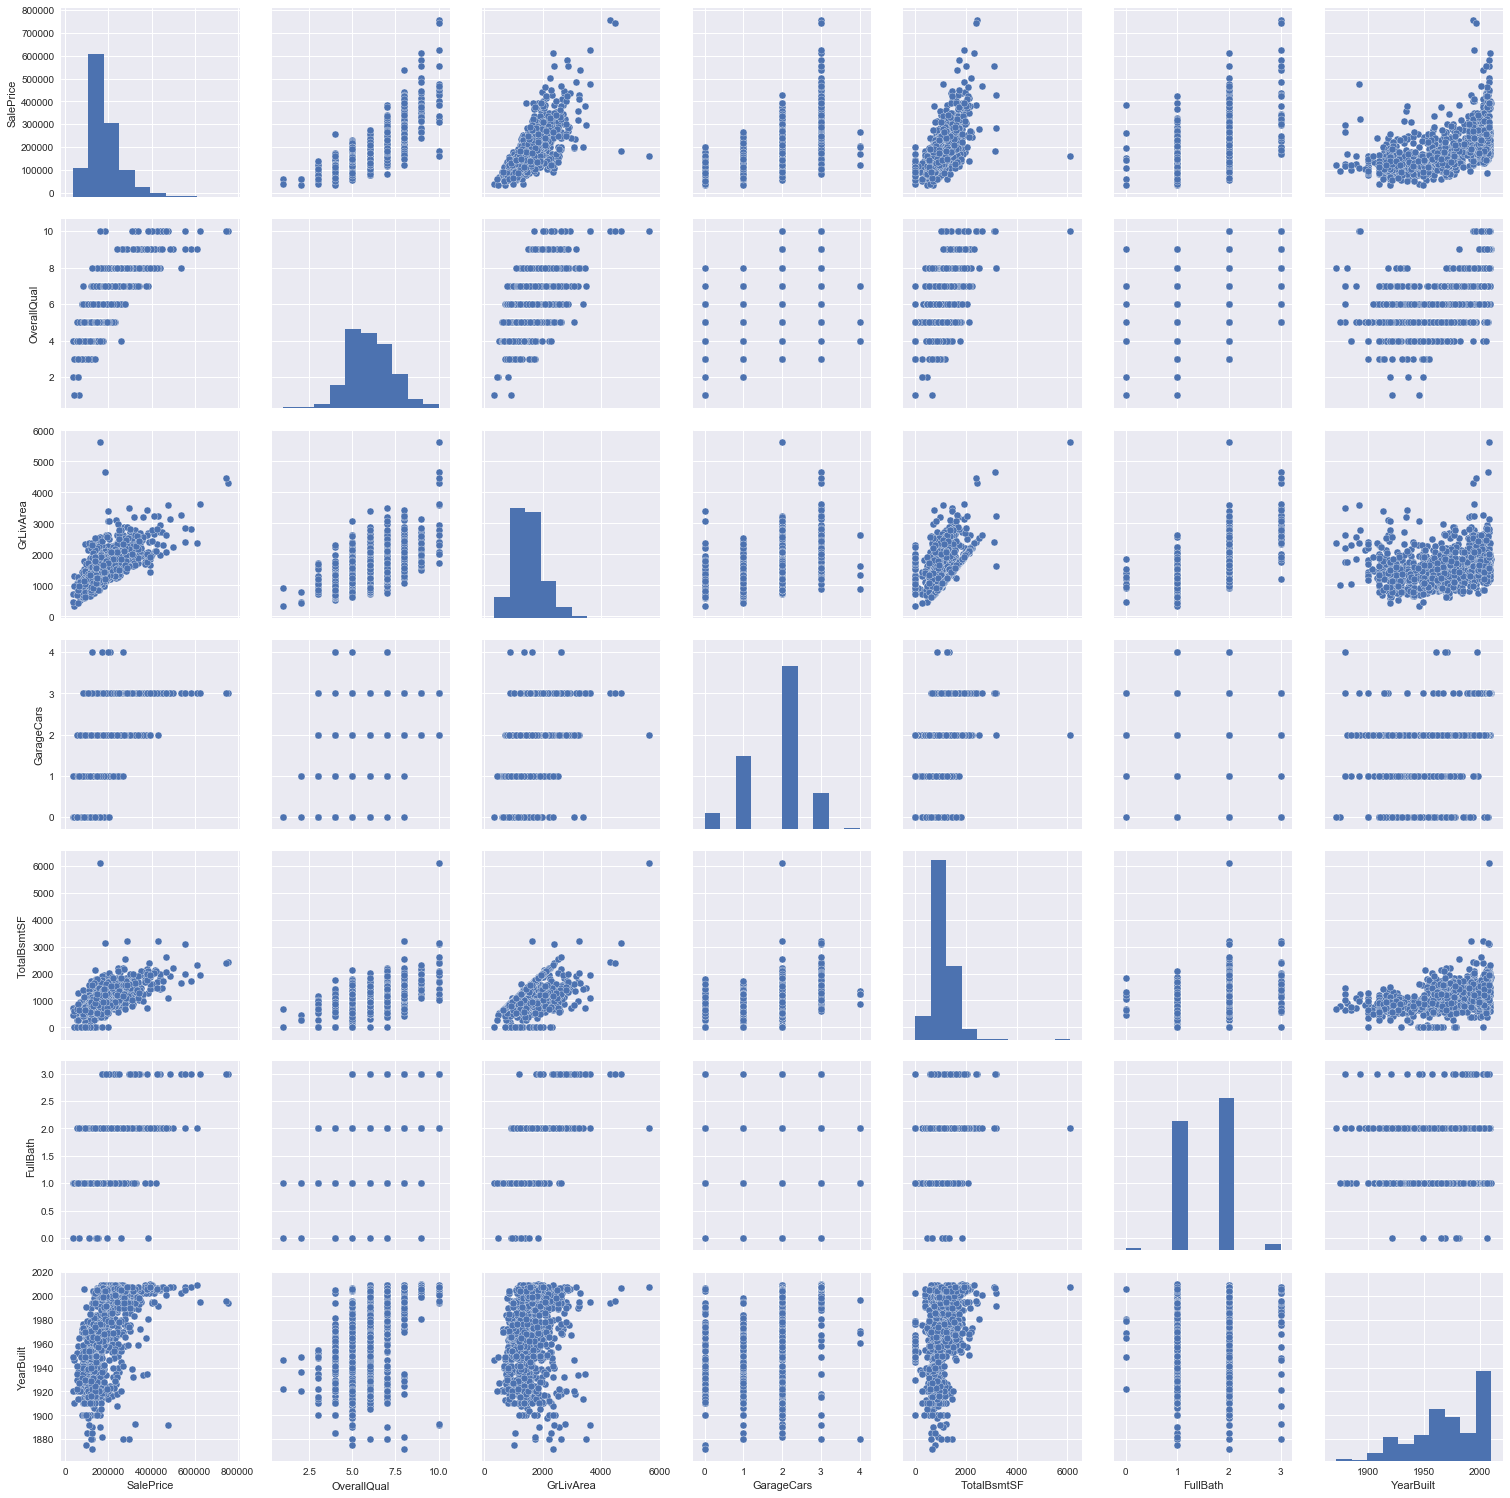

In [465]:
#scatterplot
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train[cols],size=3)
plt.show()

#### Creating Heatmaps and Dendograms

In order to find the correlation amongst the variables, the missingno heatmap and the missingno dendogram can be used

The missingno heatmap can be used to see a nulity correlation. It means that through the heatmap, it can be seen if the presence/absence of one variable can affect the presence of the other. Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

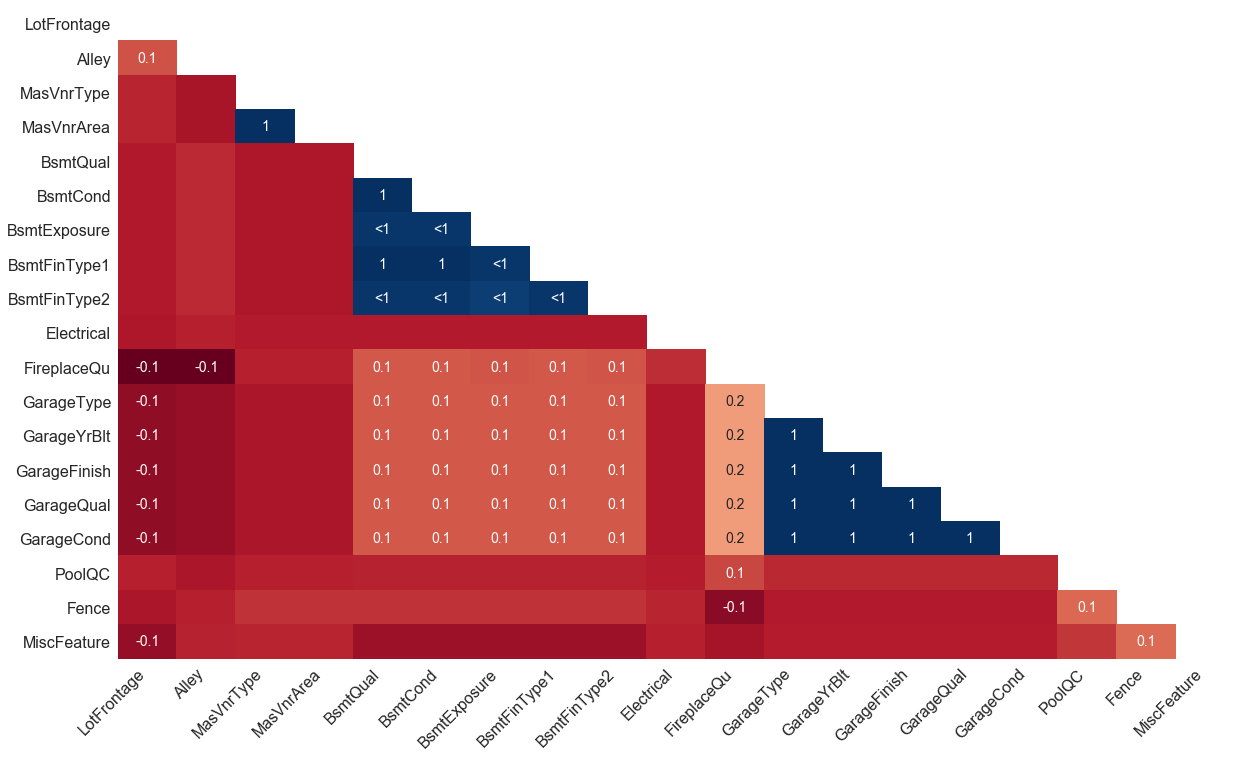

In [466]:
msno.heatmap(train)

The dendogram provides a much efficient method to provide complex relationship between the variables

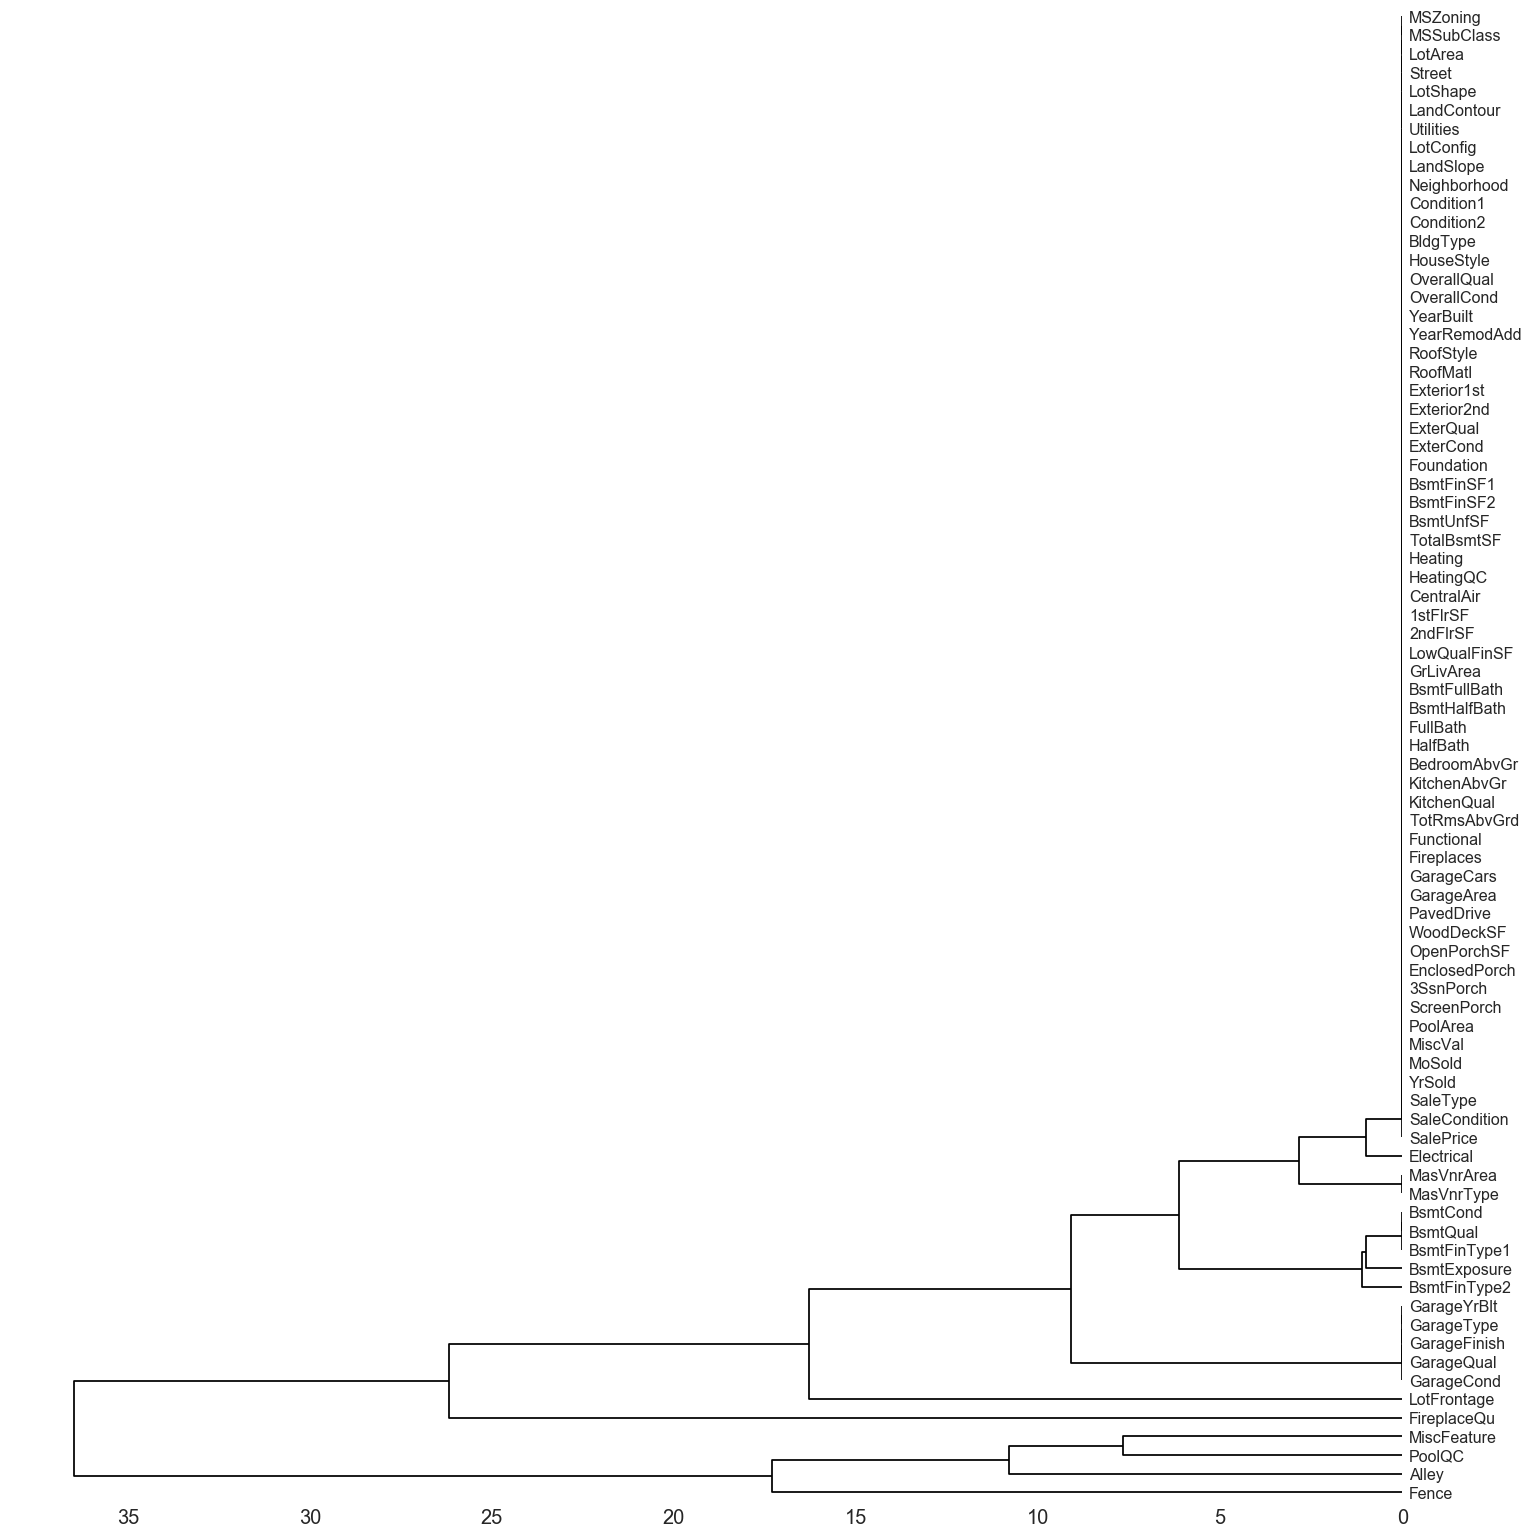

In [467]:
msno.dendrogram(train)

### Dealing with Outliers

Outliers are extreme observations in our data which can affect the accuracy of the trained model.If such observations are too less, it's safe to delete them.

Lets plot some subplots which can be used to determine some outliers

#### GrLivArea

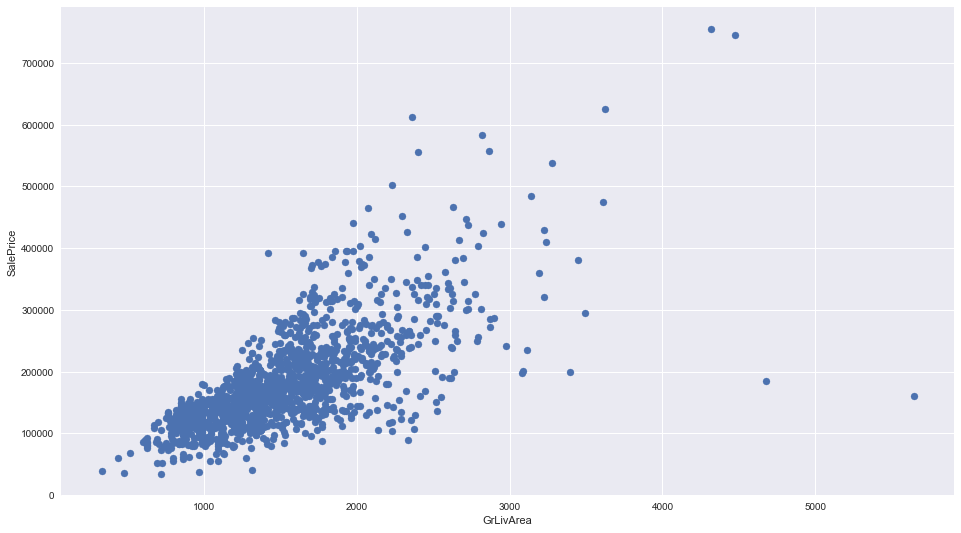

In [468]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

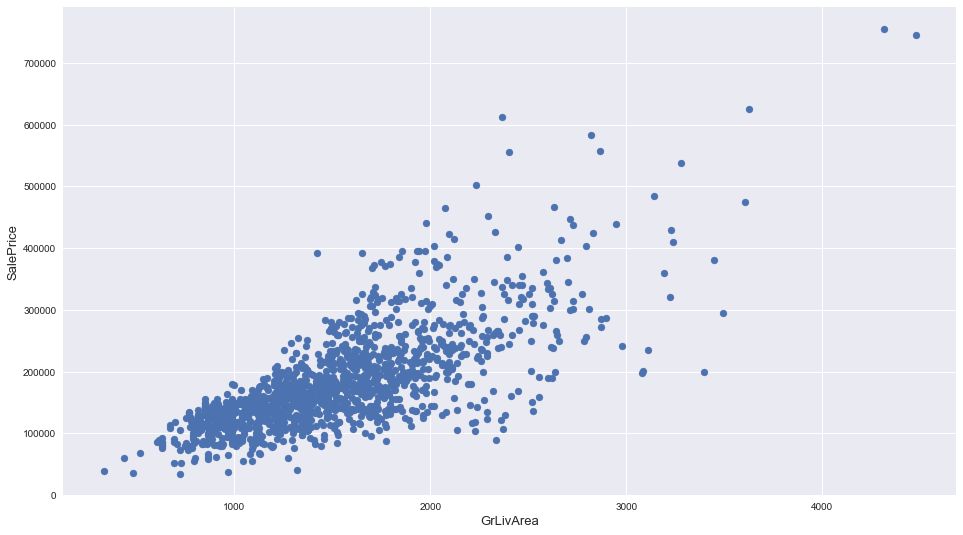

In [469]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index) #creating a virtual box to corner these
                                                                                        #outliers

#Check the graphic again
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### TotalBsmtSF

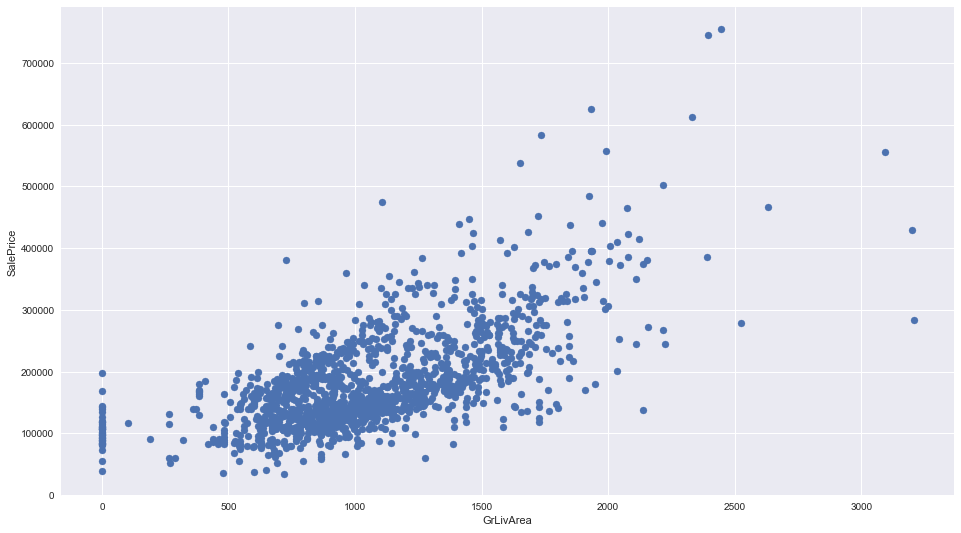

In [470]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

#### Note:

It's tempting to delete the 3 values where GrLivArea>3000. But i think that it won't affect the regression function that much. So I'm keeping them as they are. Also one thing to note during outlier deletion is that it's a trade off. The records are being deleted and so are valuable observations for that record. Outlier deletion should only be done if it seems that the recorded observation is truly an outlier and not just an observation with slight more variance

#### Normality

We will be attending to:<br>
<b>Histogram: </b> Kurtosis and skewness<br>
<b>Normal probability plot: </b>Data Distribution should closely follow the diagnol that represents the normal distribution

<b>1.SalePrice</b>


 mu = 180932.92 and sigma = 79467.79


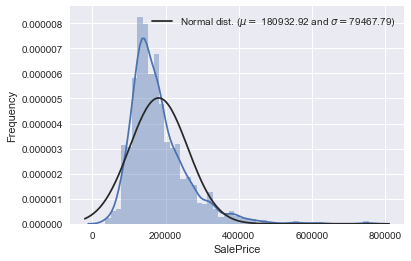

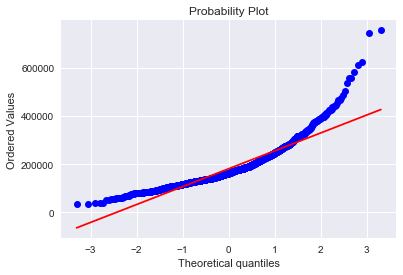

In [471]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'],fit=norm)

#getting fitted parameters used by the function
(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu = {0:.2f} and sigma = {1:.2f}'.format(mu,sigma))

#plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma = ${1:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.xlabel('SalePrice')

fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

Some notes:<br>
->The distribution is not good. Positive skewness and 'peakedness'.The probability plot doesn't follow the normal distribution diagnol<br>

->Solution: When there is positive skewness, log transformations are really helpful

In [472]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice']+1)


 mu = 12.02 and sigma = 0.40


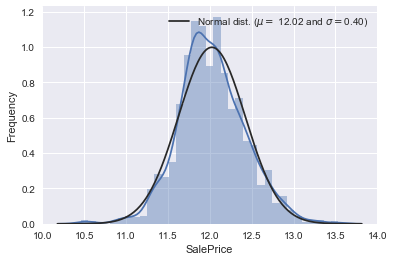

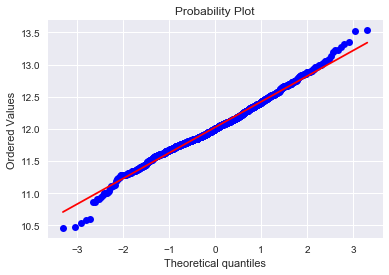

In [473]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'],fit=norm)

#getting fitted parameters used by the function
(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu = {0:.2f} and sigma = {1:.2f}'.format(mu,sigma))

#plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma = ${1:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.xlabel('SalePrice')

fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

The SalePrice variable is dealt with

<b>2.GrLivArea</b>


 mu = 1510.47 and sigma = 507.70


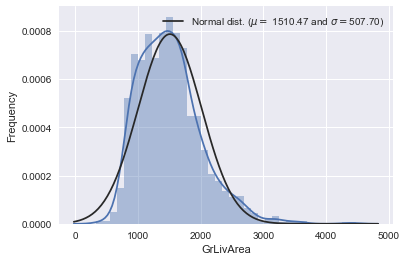

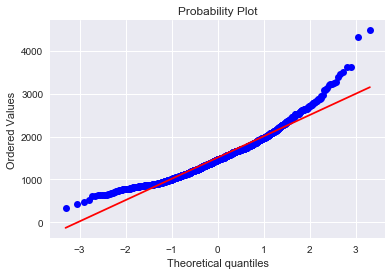

In [426]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'],fit=norm)

#getting fitted parameters used by the function
(mu,sigma) = norm.fit(train['GrLivArea'])
print('\n mu = {0:.2f} and sigma = {1:.2f}'.format(mu,sigma))

#plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma = ${1:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.xlabel('GrLivArea')

fig = plt.figure()
res = stats.probplot(train['GrLivArea'],plot=plt)
plt.show()

There is a positive skewness in the distribution. We already know the solution

In [427]:
#applying log transformation
train['GrLivArea'] = np.log(train['GrLivArea']+1)


 mu = 7.27 and sigma = 0.33


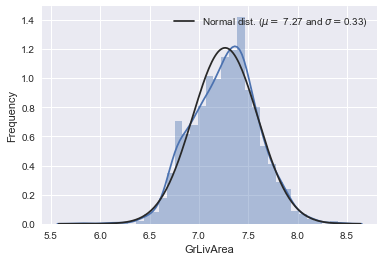

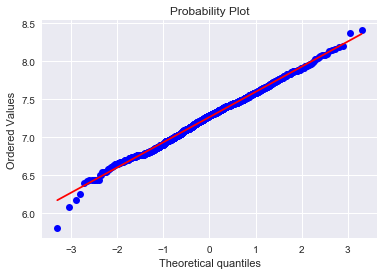

In [428]:
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea'],fit=norm)

#getting fitted parameters used by the function
(mu,sigma) = norm.fit(train['GrLivArea'])
print('\n mu = {0:.2f} and sigma = {1:.2f}'.format(mu,sigma))

#plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma = ${1:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.xlabel('GrLivArea')

fig = plt.figure()
res = stats.probplot(train['GrLivArea'],plot=plt)
plt.show()

<b>3.TotalBsmtSF</b>


 mu = 1052.54 and sigma = 414.84


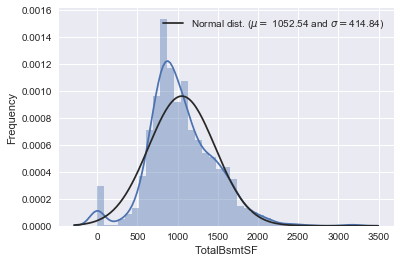

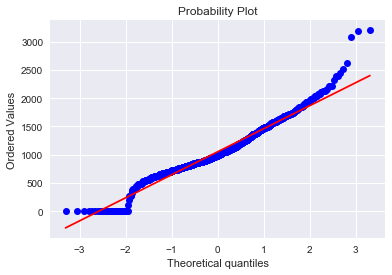

In [429]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'],fit=norm)

#getting fitted parameters used by the function
(mu,sigma) = norm.fit(train['TotalBsmtSF'])
print('\n mu = {0:.2f} and sigma = {1:.2f}'.format(mu,sigma))

#plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma = ${1:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.xlabel('TotalBsmtSF')

fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'],plot=plt)
plt.show()

Now this is a tricky one to deal with. Why? because:<br>
->Positive Skewness<br>
->If you observe the distribution carefully, there are many 0 values. so? whats the problem right?<br>
->No, because Log transformations can't happen on 0 values.<br>

->Solution: As per my research, people usually use log(x+c), but as you can see below, it doesn't exactly solve the problem.

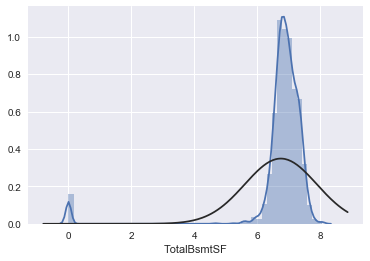

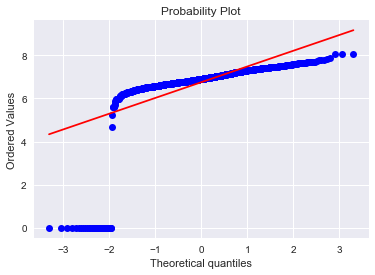

In [430]:
#transformed histogram and normal probability plot
sns.distplot(np.log(train['TotalBsmtSF']+1),fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(train['TotalBsmtSF']+1),plot=plt)

#Note:This doesn't seem well

Another solution is doing a boxcox transformation. But the boxcox transformation requires the data to be strictly positive (i.e >0). Hence combining the above approach and then doing the boxcox transformation.<br>
<b>Note:</b> I'm not entirely sure about this being the best solution to deal with this problem


 mu = 324.77 and sigma = 107.01


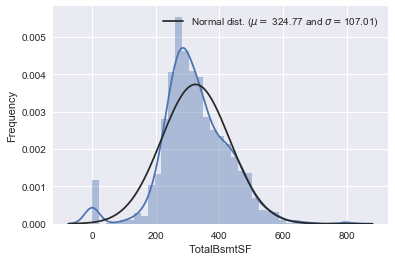

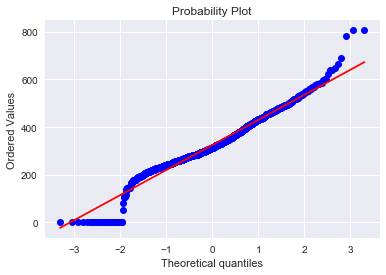

In [431]:
train['TotalBsmtSF'],maxlog = boxcox(train['TotalBsmtSF']+1)

#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'],fit=norm)

#getting fitted parameters used by the function
(mu,sigma) = norm.fit(train['TotalBsmtSF'])
print('\n mu = {0:.2f} and sigma = {1:.2f}'.format(mu,sigma))

#plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma = ${1:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.xlabel('TotalBsmtSF')

fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'],plot=plt)
plt.show()

### Dealing with Missing Values

In [474]:
#working with the missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing_vals = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_vals.head(30)

,Total,Percent
PoolQC,1452,99.588477
MiscFeature,1404,96.296296
Alley,1367,93.758573
Fence,1177,80.727023
FireplaceQu,690,47.325103
LotFrontage,259,17.764060
GarageType,81,5.555556
GarageCond,81,5.555556
GarageFinish,81,5.555556
GarageQual,81,5.555556


Text(0.5,1,'Percent missing data by feature')

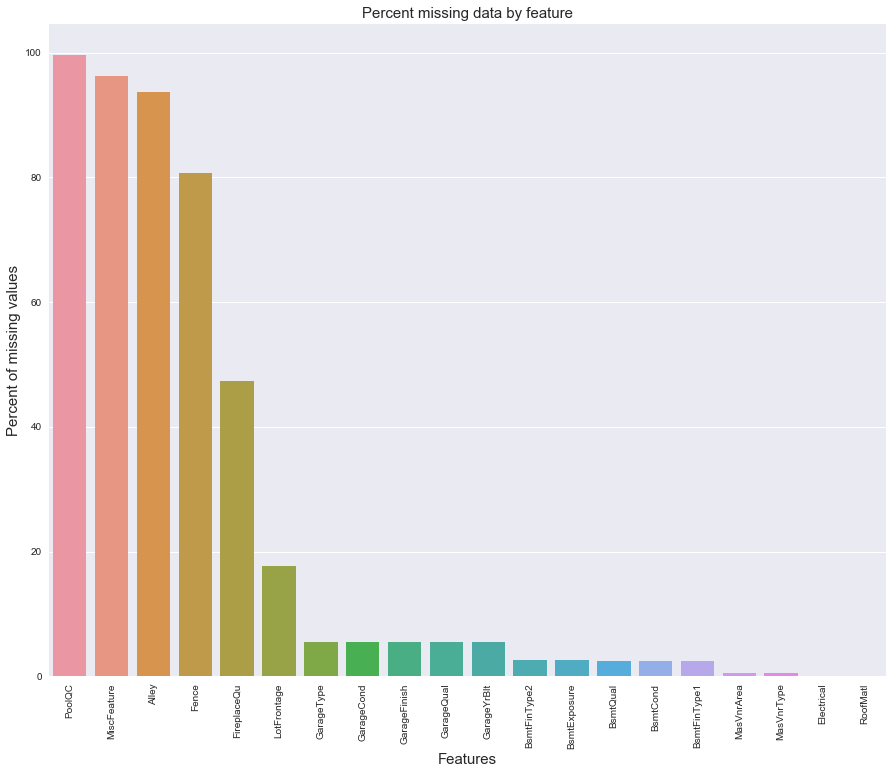

In [475]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
data_na = missing_vals[:20]
sns.barplot(x=data_na.index, y=data_na.Percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

I'm gonna fill up the missing values here. Although it should be noted that variables such as PoolQC and MiscFeature don't add much value here and can be probably removed as well.

PoolQC

In [476]:
train['PoolQC'] = train['PoolQC'].fillna('None')
test['PoolQC'] = test['PoolQC'].fillna('None')

MiscFeature

In [477]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')
test['MiscFeature'] = test['MiscFeature'].fillna('None')

Alley

In [478]:
train['Alley'] = train['Alley'].fillna('None')
test['Alley'] = test['Alley'].fillna('None')

Fence

In [479]:
train['Fence'] = train['Fence'].fillna('None')
test['Fence'] = train['Fence'].fillna('None')

FireplaceQu

In [480]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

Lot Frontage

In [481]:
#filling the lot frontage with the median value. A good trick is to use the median value of the neighbourhood rather than
#lotfrontage, so that it can be realistic in regards to other parameters as well.
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#A thing to note is why train and test be treated like the same but kept different. This is because the test data doesn't leak
#in the training set and your model doesn't 'know' your test data before testing

GarageType, GarageFinish, GarageQual and GarageCond

In [482]:
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

I'm filling all the garage and basement missing variables with 0 as no garage=no cars and also i think missing values for no basement are likely to be 0

In [483]:
for col in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

For the categorical variables MasVnrArea and MasVnrType. NA means most likely no mason as None is much on MasVnrType.For the area we can fill 0

In [484]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['MasVnrType'] = train['MasVnrType'].fillna('None')

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2. Filling them with None

In [485]:
for col in('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

Electrical has mostly 'SBrkr'. we can use that to fill it up

In [486]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [487]:
train.shape

(1458, 80)

In [488]:
test.shape

(1459, 79)

### Data Transformation

In [324]:
#Transforming some numerical variables that are really categorical

#MSSubClass = The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

#Changing OverallQual into categorical variable
train['OverallQual'] = train['OverallQual'].astype(str)
test['OverallQual'] = test['OverallQual'].astype(str)

#Changing OverallCond into categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

#Changing year sold and month sold into categorical features
train['YrSold'] = train['YrSold'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [325]:
#Label Encoding some categorical variables so that their information can be used
categorical_features = train.select_dtypes(include=[np.object])
cols = list(categorical_features.columns)

#process all the columns, apply label encoding
for c in cols:
    lbl_train = LabelEncoder()
    lbl_train.fit(list(train[c].values))
    train[c] = lbl_train.transform(list(train[c].values))
    
    lbl_test = LabelEncoder()
    lbl_test.fit(list(test[c].values))
    test[c] = lbl_test.transform(list(test[c].values))    

### Statistical Testing

Few statistical tests which can be done are:<br>
-><b>Normality: </b>Normality means that the data should have a normal distribution(bell shaped curve).It's important because tests like the t-test depend on the normality of the data.I will only perform a univariate normality test here, i.e testing for the normality of SalePrice but multivariate normality exists as well and is very helpful in removing heteroscedasticity.<br>
-><b>Homoscedasticity: </b>It just means that the target variable/dependent variable(SalePrice) exhibits equal levels of variance across the range of predictor variables.It's desirable because the error term is wanted to be same across all vals of dependent variables<br>

As such there exists skewness in many variables. They can be eliminated as well

In [489]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,12.429220
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,11.870607
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,12.634606
7,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,Shed,350,11,2009,WD,Normal,12.206078
8,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2008,WD,Abnorml,11.774528
9,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,1,2008,WD,Normal,11.678448


In [490]:
numeric_feats = train.dtypes[train.dtypes!="object"].index

#check skew of all features
skewed_feats = train[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
print("Skew Features")
skewness = pd.DataFrame({'Skew' : skewed_feats})
print(skewness)

Skew Features
                    Skew
MiscVal        24.434913
PoolArea       15.932532
LotArea        12.560986
3SsnPorch      10.286510
LowQualFinSF    8.995688
KitchenAbvGr    4.480268
BsmtFinSF2      4.247550
ScreenPorch     4.114690
BsmtHalfBath    4.095895
EnclosedPorch   3.083987
MasVnrArea      2.693554
OpenPorchSF     2.337421
LotFrontage     1.546624
WoodDeckSF      1.544214
MSSubClass      1.405563
GrLivArea       1.009951
BsmtUnfSF       0.919955
1stFlrSF        0.886723
2ndFlrSF        0.812121
BsmtFinSF1      0.764002
OverallCond     0.690324
HalfBath        0.679351
TotRmsAbvGrd    0.659822
Fireplaces      0.631409
BsmtFullBath    0.589751
TotalBsmtSF     0.511177
MoSold          0.215211
BedroomAbvGr    0.212107
OverallQual     0.200579
GarageArea      0.131612
SalePrice       0.121455
YrSold          0.095322
FullBath        0.031239
GarageCars     -0.342025
YearRemodAdd   -0.501322
YearBuilt      -0.611665
GarageYrBlt    -3.862401


To reduce the skewness here, I'm going to use the BoxCox transformation. But first of all, a threshold to check whether an observation is skewed or not has to be made. For the same, i'm assuming 0.65 as the threshold as I think it covers all the major variables fully and it would be sufficient for a proper training to the dataset

In [491]:
skewness = skewness[abs(skewness.Skew) > 0.65]
print("Features that can be skewed in the dataset are {0}".format(skewness.shape[0]))

skewed_features = skewness.index
for feat in skewed_features:
    train[feat] = np.log(train[feat]+1)
    #print("Lambda for maxlog for {0} is {1}. ".format(feat,maxlog))

Features that can be skewed in the dataset are 24


### Getting dummy encoding features

In [492]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print(all_data.shape)

(2917, 79)


In [493]:
all_data = pd.get_dummies(all_data)
train = all_data[:ntrain]
test = all_data[ntrain:]

In [494]:
train.shape

(1458, 301)

In [495]:
test.shape

(1459, 301)

In [496]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.753438,6.751101,0.0,3,6.561031,0.0,1.0,0.000000,5.017280,0.000000,...,0,0,0,0,0,1,0,1,1,0
1,7.141245,0.000000,0.0,3,6.886532,0.0,0.0,0.693147,5.652489,0.000000,...,0,0,0,0,0,1,0,1,1,0
2,6.825460,6.765039,0.0,3,6.188264,0.0,1.0,0.000000,6.075346,0.000000,...,0,0,0,0,0,1,0,1,1,0
3,6.869014,6.629363,0.0,3,5.379897,0.0,1.0,0.000000,6.293419,5.609472,...,0,0,0,0,0,1,0,1,1,0
4,7.044033,6.960348,0.0,4,6.486161,0.0,1.0,0.000000,6.196444,0.000000,...,0,0,0,0,0,1,0,1,1,0


## Modelling

In [497]:
#Import libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

### Define a cross-validation strategy

I'm going to use cross_val_score of sklearn. This function doesn't have a shuffle attribute, one code of line can be added in order to shuffle the dataset prior to cross-validation

In [498]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,train.values,y_train,scoring='neg_mean_squared_error',cv=kf))
    return(rmse)

### Base Models

1.LASSO Regression

It's sensitive to outliers. So RobustScaler() method can be used on the make_pipeline()

In [499]:
lasso_reg = make_pipeline(RobustScaler(),Lasso(random_state=42))

2.Elastic Net Regression

In [500]:
enet_reg = make_pipeline(RobustScaler(),ElasticNet(random_state=42))

3.Kernel Ridge Regression

In [501]:
krr_reg = KernelRidge(kernel="polynomial") #using krr instead of SVR because it's much faster on medium sized datasets

4.Gradient Boosting Regression

huber loss makes it robust to outliers

In [502]:
gboost_reg = GradientBoostingRegressor(loss='huber',random_state=42)

5.XGBoost

In [503]:
xgb_reg = xgb.XGBRegressor(random_state=42)

### Base model scores

In [504]:
score = rmsle_cv(lasso_reg)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3782 (0.0130)



In [505]:
score = rmsle_cv(enet_reg)
print("\nElastic Net score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic Net score: 0.3781 (0.0126)



In [506]:
score = rmsle_cv(xgb_reg)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1238 (0.0057)



In [507]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [508]:
xgb_reg.fit(train,y_train)
xgb_train_pred = xgb_reg.predict(train)
xgb_pred = np.expm1(xgb_reg.predict(test))
print(rmsle(y_train,xgb_train_pred))

0.08590296803965951


### Submission

In [397]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

In [398]:
xgb_pred.shape

(1459,)